# ✅ Project: A/B Testing for Landing Page Campaign Conversion Optimization

## 📌 Objective
#### To determine whether there's a statistically significant difference in purchase behavior and returns between two digital ad bidding strategies:

#### *Control group: Maximum Bidding campaign

#### *Test group: Average Bidding campaign

## 1. 📥 Data Collection & Preparation

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# Read the Excel sheets
data_control = pd.read_excel("ab_testing.xlsx", sheet_name="Control Group")
data_test = pd.read_excel("ab_testing.xlsx", sheet_name="Test Group")

# Keep only relevant columns
columns = ['Impression', 'Click', 'Purchase', 'Earning']
data_control = data_control[columns]
data_test = data_test[columns]


## 2. 🔍 Exploratory Data Analysis (EDA)

In [2]:
print("Control Group Summary:\n", data_control.describe())
print("Test Group Summary:\n", data_test.describe())

Control Group Summary:
           Impression        Click    Purchase      Earning
count      40.000000    40.000000   40.000000    40.000000
mean   101711.449068  5100.657373  550.894059  1908.568300
std     20302.157862  1329.985498  134.108201   302.917783
min     45475.942965  2189.753157  267.028943  1253.989525
25%     85726.690349  4124.304129  470.095533  1685.847205
50%     99790.701078  5001.220602  531.206307  1975.160522
75%    115212.816543  5923.803596  637.957088  2119.802784
max    147539.336329  7959.125069  801.795020  2497.295218
Test Group Summary:
           Impression        Click    Purchase      Earning
count      40.000000    40.000000   40.000000    40.000000
mean   120512.411758  3967.549761  582.106097  2514.890733
std     18807.448712   923.095073  161.152513   282.730852
min     79033.834921  1836.629861  311.629515  1939.611243
25%    112691.970770  3376.819024  444.626828  2280.537426
50%    119291.300775  3931.359804  551.355732  2544.666107
75%    1320

### 🔹 Initial Observation
#### *Test group has more impressions but doesn't guarantee higher purchase returns.

#### *Slightly higher mean Purchase in the test group:

####    *Control: ~550.89

####    *Test: ~582.10

## 3. 🎯 Hypothesis Formulation
#### Purchase Behavior Hypothesis
####   *H0: No significant difference in average purchase between Control and Test groups.

####   *H1: There is a significant difference.

## 4. ✅ Assumption Checks
#### 4.1 Normality (Shapiro-Wilk Test)

In [3]:
for name, data in zip(["Control", "Test"], [data_control, data_test]):
    stat, p = shapiro(data["Purchase"])
    print(f"{name} - Shapiro-Wilk Test: stat={stat:.4f}, p={p:.4f}")


Control - Shapiro-Wilk Test: stat=0.9773, p=0.5891
Test - Shapiro-Wilk Test: stat=0.9589, p=0.1541


#### Result:
#### ✅ Both groups follow normal distribution (p > 0.05)

## 4.2 Homogeneity of Variances (Levene’s Test)

In [5]:
stat, p = levene(data_control["Purchase"], data_test["Purchase"])
print(f"Levene’s Test: stat={stat:.4f}, p={p:.4f}")

Levene’s Test: stat=2.6393, p=0.1083


## 5. 🧪 Hypothesis Testing
### 5.1 Independent Two-Sample T-Test

In [6]:
stat, p = ttest_ind(data_control["Purchase"], data_test["Purchase"], equal_var=True)
print(f"T-Test: stat={stat:.4f}, p={p:.4f}")

T-Test: stat=-0.9416, p=0.3493


#### Result:
#### p = 0.3493 ➡️ Fail to reject H0

#### ❌ No significant difference between groups

## 6. 📈 Segment-Wise Comparison (Grouped by Impressions)

In [7]:
control_means = data_control.groupby("Impression")["Purchase"].mean()
test_means = data_test.groupby("Impression")["Purchase"].mean()

# Normality
shapiro(control_means)
shapiro(test_means)

# Variance
levene(control_means, test_means)

# T-test
ttest_ind(control_means, test_means, equal_var=True)


TtestResult(statistic=-0.9415584300312966, pvalue=0.34932579202108416, df=78.0)

#### 📊 Again, no significant difference found.

## 7. 📉 P-Value Trend Visualization

C:\Users\OBINNA\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:6951: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


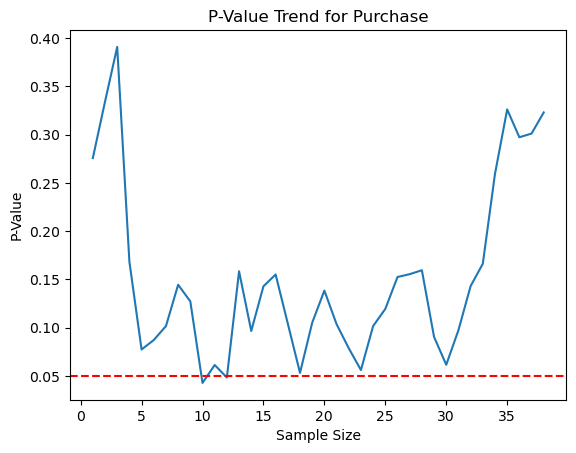

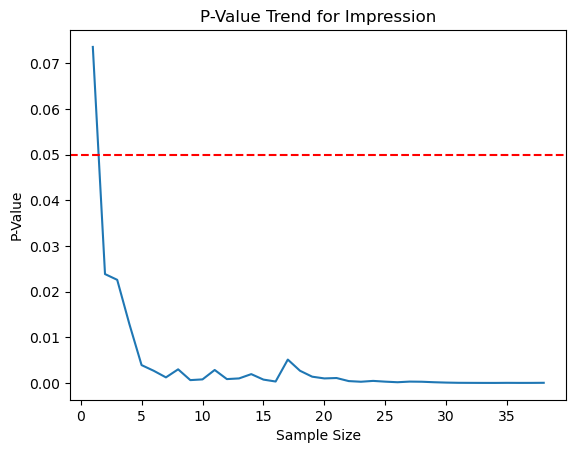

C:\Users\OBINNA\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\OBINNA\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


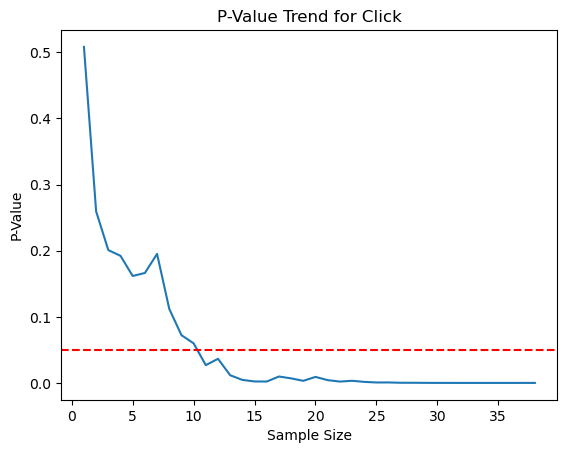

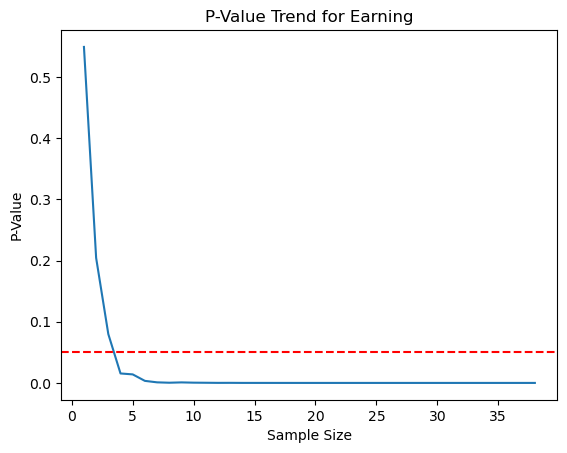

In [8]:
def pvalue_plot(col, equal_var=True):
    pvalue_list = []
    for i in range(1, len(data_control[col])):
        _, pval = ttest_ind(data_control[col][:i], data_test[col][:i], equal_var=equal_var)
        pvalue_list.append(pval)
    plt.plot(pvalue_list)
    plt.title(f"P-Value Trend for {col}")
    plt.xlabel("Sample Size")
    plt.ylabel("P-Value")
    plt.axhline(0.05, color='r', linestyle='--')
    plt.show()

for col in ['Purchase', 'Impression', 'Click', 'Earning']:
    pvalue_plot(col, equal_var=True if col != 'Click' else False)


#### 📌 Observations:

#### Impression & Click show divergence → potential user behavior differences.

#### Purchase and Earning don’t show statistically significant differences.

## 8. 🧠 Automated Testing Function

In [9]:
def compare_metrics(df1, df2, metric, alpha=0.05):
    print(f"\nComparing {metric}:")
    stat1, p1 = shapiro(df1[metric])
    stat2, p2 = shapiro(df2[metric])
    stat_lev, p_lev = levene(df1[metric], df2[metric])
    
    if p1 > alpha and p2 > alpha:
        if p_lev > alpha:
            stat, p_final = ttest_ind(df1[metric], df2[metric], equal_var=True)
        else:
            stat, p_final = ttest_ind(df1[metric], df2[metric], equal_var=False)
    else:
        stat, p_final = mannwhitneyu(df1[metric], df2[metric])
    
    print(f"P-Value = {p_final:.4f}")
    if p_final < alpha:
        print("❗ Significant difference found.")
    else:
        print("✅ No significant difference.")

# Run comparisons
for metric in columns:
    compare_metrics(data_control, data_test, metric)



Comparing Impression:
P-Value = 0.0000
❗ Significant difference found.

Comparing Click:
P-Value = 0.0000
❗ Significant difference found.

Comparing Purchase:
P-Value = 0.3493
✅ No significant difference.

Comparing Earning:
P-Value = 0.0000
❗ Significant difference found.


### ✅ Final Conclusion & Recommendation
### 🔍 Findings

  #####  *No statistically significant difference in Purchase or Earning between the Maximum Bidding and 
  #####   Average Bidding campaigns.

  #####  *Impression and Click counts differ significantly, indicating behavioral shifts in user engagement, 
  #####   but this does not translate into more purchases or revenue.

## 📌 Recommendation

🔹 Stick with Maximum Bidding for now — it's performing equally well, and you avoid the risk of underbidding and losing high-value impressions.

🔹 Continue testing variations like ad creatives, messaging, or offer framing rather than bid strategy alone.

🔹 Consider testing other metrics:

    *Conversion rate (Purchase/Click)
    
    *Cost-per-conversion
    
    *Return on Ad Spend (ROAS)

🔹 Segment analysis (e.g., by time, geo, device) could uncover hidden differences.